In [12]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys. Place your keys here.
from config import api_keyTwitter
from config import api_secretTwitter
from config import access_tokenTwitter
from config import access_tokensecretTwitter

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(api_keyTwitter, api_secretTwitter)
auth.set_access_token(access_tokenTwitter, access_tokensecretTwitter)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [16]:
# Target Account
#BBC, CBS, CNN, Fox, and New York times
target_user = ("@CNNbrk","@BBC","@CBS", "@FOXTV", "@nytimes" )

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []


for network in target_user: 
    
   # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
       
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):        
       
    # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user)

        # Loop through all tweets 

        for tweet in public_tweets: #from previous program
        #for tweet in public_tweets["statuses"]:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
             # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            

            # Add sentiments for each tweet into an array
            sentiments.append({"Network": network,
                               #"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter = counter + 1
 

In [17]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#sentiments_pd.head()
sentiments_pd

,Compound,Negative,Network,Neutral,Positive,Tweets Ago
0,0.8807,0.595,@CNNbrk,0.000,0.405,1
1,0.5574,0.783,@CNNbrk,0.000,0.217,2
2,0.6705,0.476,@CNNbrk,0.000,0.524,3
3,0.7824,0.623,@CNNbrk,0.000,0.377,4
4,0.7430,0.717,@CNNbrk,0.000,0.283,5
5,0.5719,0.802,@CNNbrk,0.000,0.198,6
6,-0.3400,0.556,@CNNbrk,0.278,0.167,7
7,0.0000,1.000,@CNNbrk,0.000,0.000,8
8,0.4588,0.571,@CNNbrk,0.000,0.429,9
9,0.0000,1.000,@CNNbrk,0.000,0.000,10


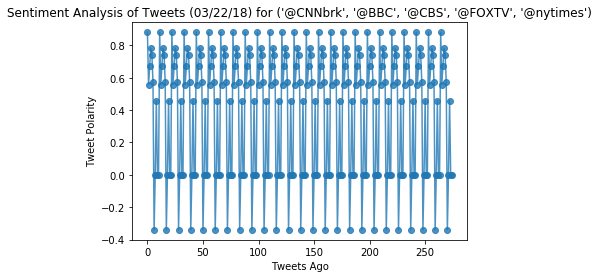

In [20]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o",
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()